# Ví dụ về Multilayer Perceptron với tập MNIST

Xây dựng mạng fully connected với 2 lớp ẩn sử dụng Tensorflow

## Tổng quan về Neural Network

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## Tập dữ liệu MNIST

Ví dụ này sử dụng tập ảnh chữ số viết tay MNIST. MNIST gồm 60,000 ảnh cho huấn luyện và 10,000 ảnh cho kiểm thử mô hình. Mọi ảnh chữ số viết tay trong tập dữ liệu được chuẩn hóa về kích thước, cụ thể là (28x28) với giá trị pixels nằm trong khoảng 0 đến 1. Để đơn giản bài troán, mỗi ảnh được trải phẳng thành mảng numpy một chiều (784 thành phần)

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

Tham khảo: http://yann.lecun.com/exdb/mnist/

### Tải về dữ liệu MNIST

In [0]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

### Siêu tham số

In [0]:
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

### Tham số mô hình

In [0]:
n_hidden_1 = 256 # layer thứ nhất với 256 neurons
n_hidden_2 = 256 # layer thứ hai với 256 neurons
num_input = 784 # Số features đầu vào (tập MNIST với shape: 28*28)
num_classes = 10 # Tổng số lớp của MNIST (các số từ 0-9)

### Đặt đầu vào cho graph

In [0]:
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

### Khai báo trọng số mô hình

In [0]:
# Các biến lưu trữ weight & bias của các layers
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

### Xây dựng mô hình

In [0]:
def neural_net(x):
    # Lớp fully connected với 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Lớp fully connected thứ 2 với 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Lớp output fully connected với mỗi neuron cho một class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [0]:
# Tạo model
logits = neural_net(X)

# Định nghĩa hàm loss và optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Đánh giá model
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Hàm khởi tạo các biến (gán giá trị mặc định)
init = tf.global_variables_initializer()

### Huấn luyện và kiểm thử mô hình

In [36]:
with tf.Session() as sess:

    # Chạy hàm khởi tạo
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Chạy hàm tối ưu (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # tính loss và accuracy cho một batch
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Tính accuracy cho tập kiểm thử của MNIST
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    
    # Lấy về dự đoán của mô hình đối với các ảnh thuộc tập kiểm thử trong MNIST    
    preds = tf.argmax(logits, 1)
    preds = sess.run(preds, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels})
   

Step 1, Minibatch Loss= 11493.5596, Training Accuracy= 0.305
Step 100, Minibatch Loss= 287.8065, Training Accuracy= 0.828
Step 200, Minibatch Loss= 181.7354, Training Accuracy= 0.836
Step 300, Minibatch Loss= 70.8509, Training Accuracy= 0.867
Step 400, Minibatch Loss= 37.3896, Training Accuracy= 0.914
Step 500, Minibatch Loss= 31.9864, Training Accuracy= 0.906
Optimization Finished!
Testing Accuracy: 0.8635


### Xem thử một vài ví dụ mà mô hình dự đoán

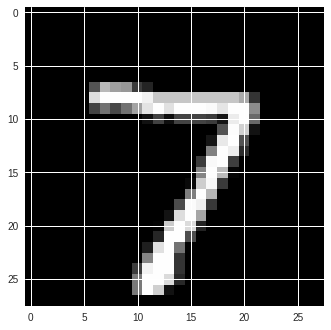

Kết quả dự đoán: 7


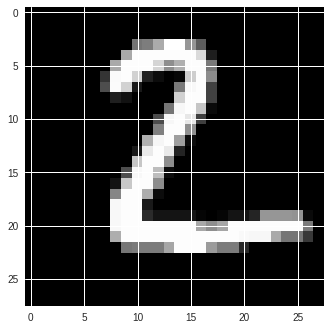

Kết quả dự đoán: 2


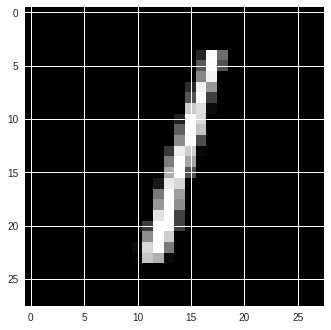

Kết quả dự đoán: 1


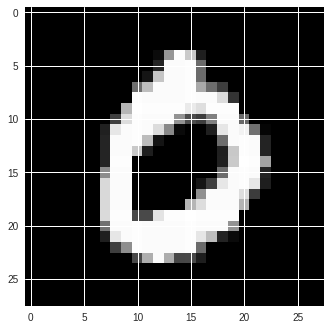

Kết quả dự đoán: 0


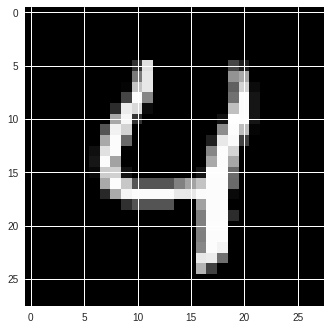

Kết quả dự đoán: 4


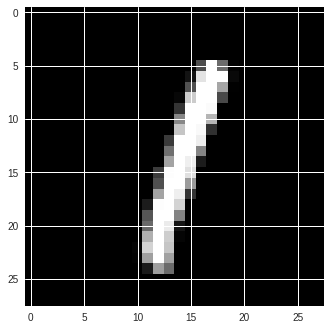

Kết quả dự đoán: 1


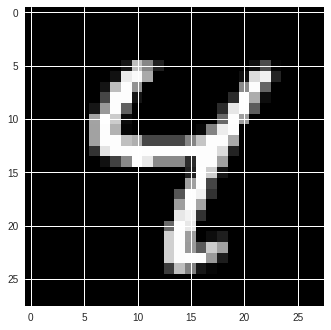

Kết quả dự đoán: 4


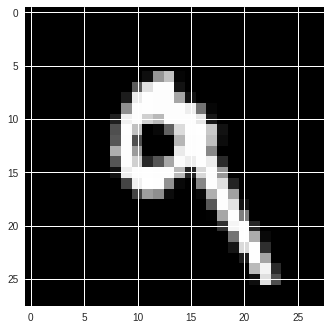

Kết quả dự đoán: 9


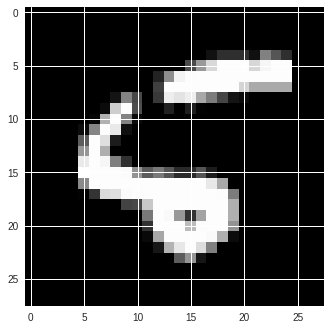

Kết quả dự đoán: 6


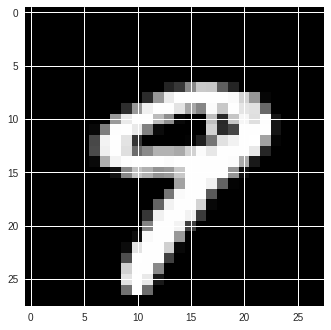

Kết quả dự đoán: 9


In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Xem kết quả dự đoán của 10 ảnh đầu tiên trong tập kiểm thử
for i in range(10):
    plt.imshow(np.reshape(mnist.test.images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Kết quả dự đoán:", preds[i])